In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Read data

In [3]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

In [4]:
batch_size = 100

In [5]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
examples = iter(train_dataloader)
samples, labels = examples.next()

In [7]:
## batch_size = 100
## number_of_channel = 1
## image size = 28*28
print(f"Samples : {samples.shape}, Labels : {labels.shape}")

Samples : torch.Size([100, 1, 28, 28]), Labels : torch.Size([100])


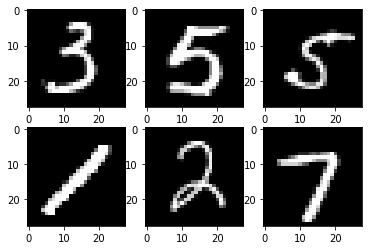

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [9]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_channel, num_classes):
        super(NeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = input_channel, out_channels = 16, kernel_size = 5)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(5,2)
        self.fc1 = nn.Linear(16*10*10, 120)
        self.fc2 = nn.Linear(120,num_classes)
        
        
    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = x.view(-1, 16*10*10)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
in_channel  = 1 ## 28*28
num_classes = 10
num_epochs = 3
learning_rate = 0.01

In [11]:
model = NeuralNet(in_channel, num_classes)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criteria = nn.CrossEntropyLoss()

In [12]:
def evaluate(model):
    model.eval()
    
    n_corrected = 0
    n_samples = 0
    
    for images, labels in test_dataloader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predictions = torch.max(outputs,axis=1)
        
        n_corrected += (predictions==labels).sum().item()
        n_samples += len(labels)
    
    return n_corrected/n_samples

In [13]:
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_dataloader):
        ## forward
        y_pred = model(images)
        ##loss
        loss = criteria(y_pred, labels)
        ## backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 ==0:
            val_accuracy = evaluate(model)
            print(f"Epoch : {epoch+1}/{num_epochs},  Step : {i+1}/{len(train_dataloader)}, Train Loss : {loss.item():.4f}, Val Accuracy : {val_accuracy:.4f}")

Epoch : 1/3,  Step : 100/600, Train Loss : 0.0964, Val Accuracy : 0.9585
Epoch : 1/3,  Step : 200/600, Train Loss : 0.1612, Val Accuracy : 0.9686
Epoch : 1/3,  Step : 300/600, Train Loss : 0.0604, Val Accuracy : 0.9632
Epoch : 1/3,  Step : 400/600, Train Loss : 0.0908, Val Accuracy : 0.9766
Epoch : 1/3,  Step : 500/600, Train Loss : 0.1392, Val Accuracy : 0.9779
Epoch : 1/3,  Step : 600/600, Train Loss : 0.0123, Val Accuracy : 0.9782
Epoch : 2/3,  Step : 100/600, Train Loss : 0.0782, Val Accuracy : 0.9790
Epoch : 2/3,  Step : 200/600, Train Loss : 0.1273, Val Accuracy : 0.9783
Epoch : 2/3,  Step : 300/600, Train Loss : 0.0309, Val Accuracy : 0.9791
Epoch : 2/3,  Step : 400/600, Train Loss : 0.0978, Val Accuracy : 0.9782
Epoch : 2/3,  Step : 500/600, Train Loss : 0.0834, Val Accuracy : 0.9786
Epoch : 2/3,  Step : 600/600, Train Loss : 0.0252, Val Accuracy : 0.9823
Epoch : 3/3,  Step : 100/600, Train Loss : 0.0365, Val Accuracy : 0.9792
Epoch : 3/3,  Step : 200/600, Train Loss : 0.0891, 